In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import folium
from folium import plugins

In [3]:
data = pd.read_csv('fire_nrt_V1_96617.csv')
sample_data = data.iloc[np.random.choice(data.index, 1000)]

In [4]:
sample_data.head(7)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
777094,-37.65353,148.14696,367.0,0.42,0.37,2019-12-30,1512,N,VIIRS,h,1.0NRT,277.0,6.6,N
130790,-30.35986,150.21205,298.5,0.41,0.37,2019-10-28,1454,N,VIIRS,n,1.0NRT,286.5,1.5,N
868366,-34.28228,150.10909,330.5,0.49,0.48,2020-01-03,418,N,VIIRS,l,1.0NRT,304.0,4.1,D
380575,-21.31719,119.59174,208.0,0.35,0.57,2019-11-26,618,N,VIIRS,l,1.0NRT,322.2,78.1,D
152157,-31.05411,123.52778,351.4,0.55,0.68,2019-11-04,624,N,VIIRS,n,1.0NRT,305.6,38.9,D
908563,-37.15030,149.52464,367.0,0.53,0.42,2020-01-04,1518,N,VIIRS,h,1.0NRT,290.9,32.0,N
499401,-30.66254,119.88022,349.1,0.39,0.36,2019-12-08,548,N,VIIRS,n,1.0NRT,316.3,9.2,D


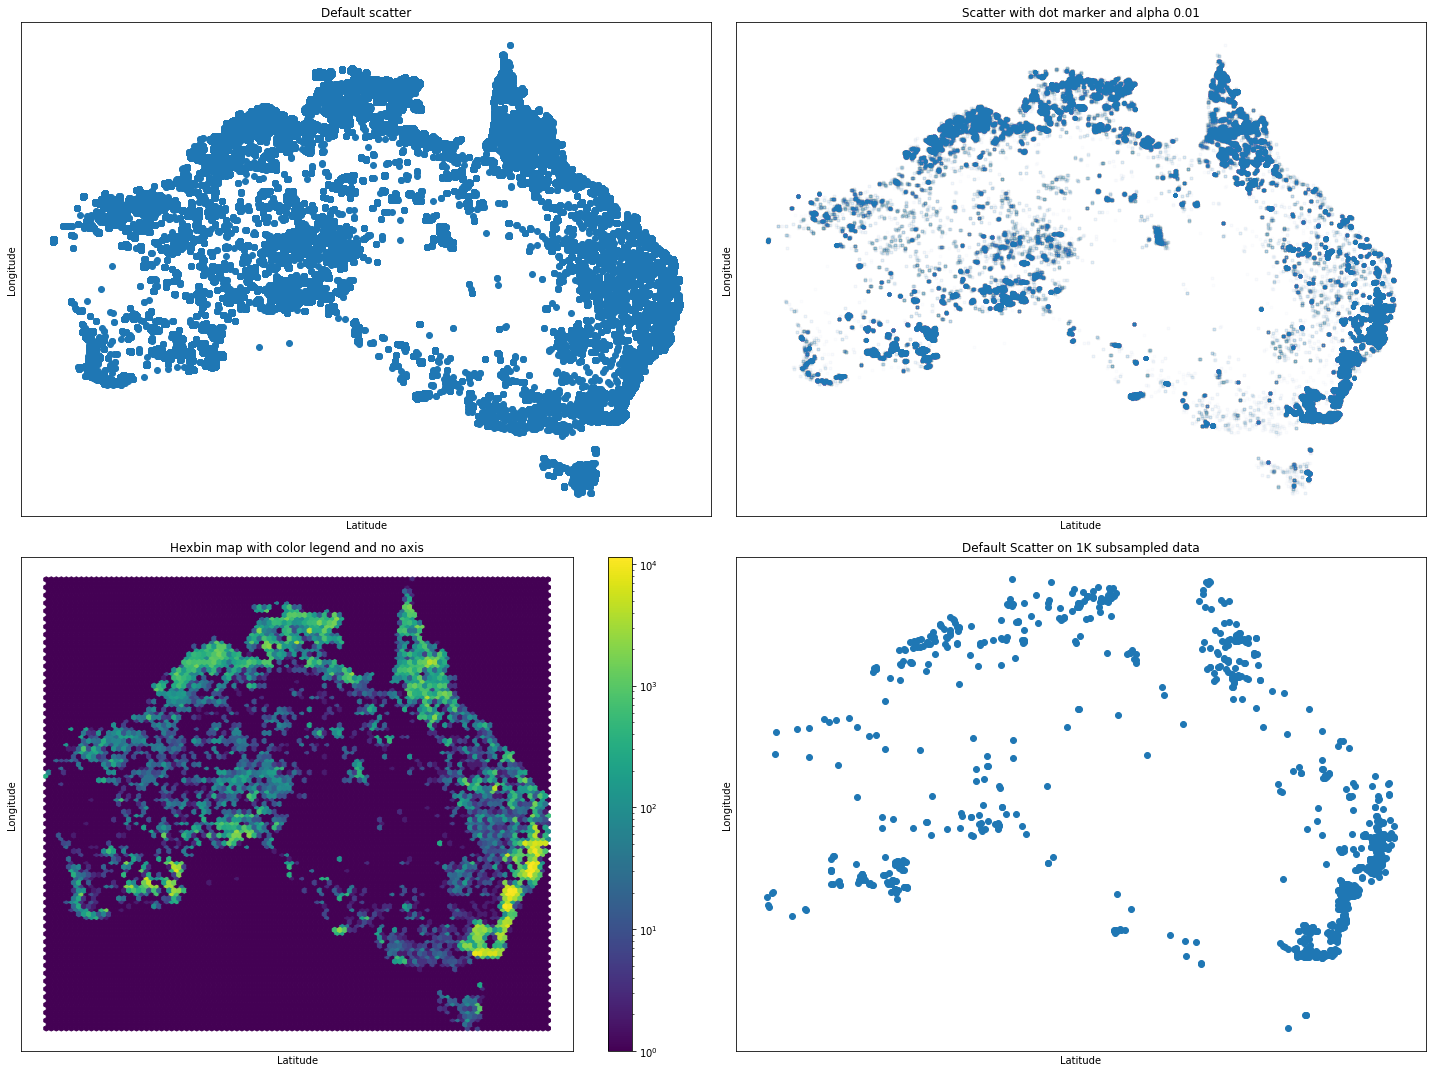

In [5]:
fig, axes = plt.subplots(2,2, figsize =(20,15), subplot_kw={'xticks': (), 'yticks': ()})
axes[0,0].scatter(data.longitude,data.latitude)
axes[0,0].set_title("Default scatter")
axes[0,1].scatter(data.longitude,data.latitude, alpha=0.01, marker=".")
axes[0,1].set_title("Scatter with dot marker and alpha 0.01")
img = axes[1,0].hexbin(data.longitude,data.latitude, bins='log')
axes[1,0].set_title("Hexbin map with color legend and no axis")
axes[1,1].scatter(sample_data.longitude, sample_data.latitude)
axes[1,1].set_title("Default Scatter on 1K subsampled data")
for ax in axes.ravel():
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
plt.tight_layout()
fig.colorbar(img, ax=axes[1,0])
plt.show()

# Create a map

In [6]:
f = folium.Figure(width=1000, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,sample_data.shape[0]):    
    location=[sample_data.iloc[i]['latitude'], sample_data.iloc[i]['longitude']]
    folium.CircleMarker(location,radius=1,color='red').add_to(m)
    
m

Text(0, 0.5, 'Counts')

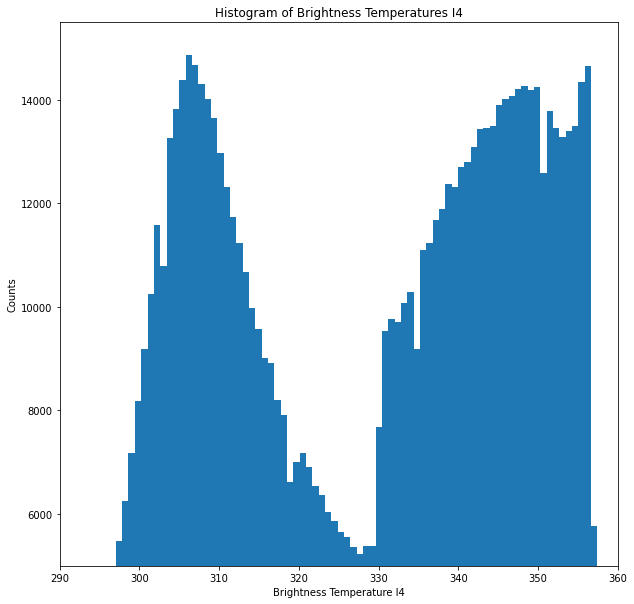

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(data.bright_ti4,bins=200)
ax.set_xlim(290,360)
ax.set_ylim(5000,1.55e4)
ax.set_title("Histogram of Brightness Temperatures I4")
ax.set_xlabel("Brightness Temperature I4")
ax.set_ylabel("Counts")

In [8]:
df1=pd.read_csv('fire_nrt_M6_96619.csv')

In [9]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,-14.281,143.636,323.9,1.7,1.3,2019-10-01,25,Terra,MODIS,70,6.0NRT,302.3,26.8,D
1,-14.284,143.532,343.5,1.7,1.3,2019-10-01,25,Terra,MODIS,90,6.0NRT,306.3,84.3,D
2,-14.302,143.706,320.2,1.7,1.3,2019-10-01,25,Terra,MODIS,30,6.0NRT,305.0,14.1,D
3,-14.283,143.652,320.4,1.7,1.3,2019-10-01,25,Terra,MODIS,57,6.0NRT,303.3,18.4,D
4,-14.285,143.521,349.4,1.7,1.3,2019-10-01,25,Terra,MODIS,94,6.0NRT,304.7,110.7,D


In [12]:
df1_night=df1.loc[df1['daynight'].isin(['N'])]
df1_day=df1.loc[df1['daynight'].isin(['D'])]

In [13]:
mask = data['bright_ti4'] >= 330
sat_df = data[mask]
unsat_df = data[~mask]

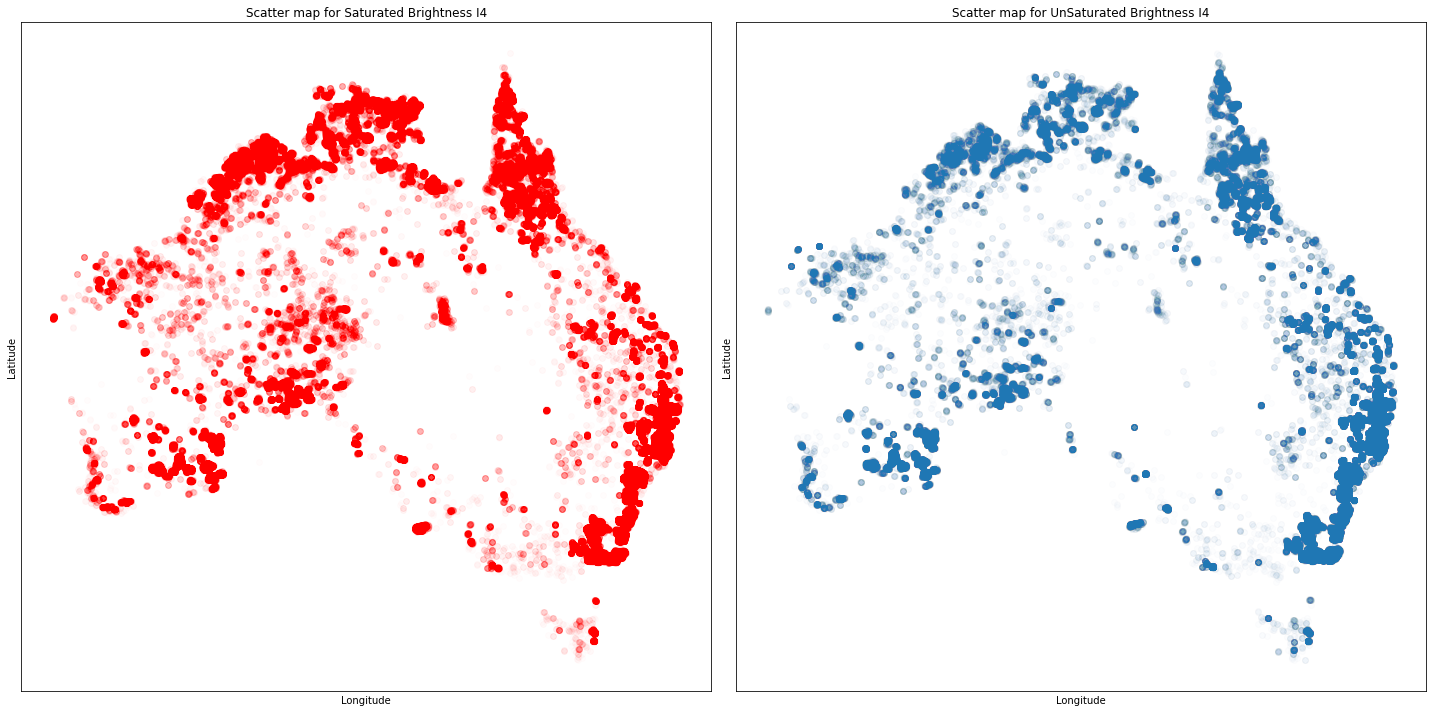

In [16]:
fig, axes = plt.subplots(1,2, figsize =(20,10), subplot_kw={'xticks': (), 'yticks': ()})
img = axes[0].scatter(sat_df.longitude,sat_df.latitude, alpha=0.01, color='red')
axes[0].set_title("Scatter map for Saturated Brightness I4")
img = axes[1].scatter(unsat_df.longitude,unsat_df.latitude, alpha=0.01)
axes[1].set_title("Scatter map for UnSaturated Brightness I4")

for ax in axes.ravel():
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()